# LightGBM : DataStructure API

Read Titanic Data

Split Data : Train, Validation, Test

Convert Data to LGBM Data Structure

Train Model using LGBM DataStrcurure API

Predict

Performnace Measure on Test Data

Plot Metrics 

SHAP Analysis

Cross-Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

In [2]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [3]:
import lightgbm as lgb

In [4]:
try:
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

### Read Data

In [5]:
# import seaborn as sns
# train_df = sns.load_dataset('titanic')
# train_df = train_df.drop(['who','alive','alone'], axis=1)

In [6]:
# """CatBoost"""
# from catboost.datasets import titanic
# train_df, test_df = titanic()

In [7]:
# null_value_stats = train_df.isnull().sum(axis=0)
# null_value_stats[null_value_stats != 0]
# train_df.fillna(np.nan, inplace=True)
# test_df.fillna(np.nan, inplace=True)

In [8]:
# X = train_df.drop('Survived', axis=1)
# y = train_df.Survived

In [9]:
from ipynb.fs.full.dataProcessing_titanicData import *

In [10]:
train_df, test_df = train_test_ordinal

In [11]:
X = train_df.drop('Survived', axis=1)
y = train_df.Survived

#### Split Data

In [12]:
"""Setting the Seed"""
theSeed = 209

In [13]:
feature_names = X.columns.tolist()
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_names = X.columns[ categorical_features_indices ].tolist()
print(f"Total Features : {feature_names}" )
print(f"Categorical Features : {categorical_features_names}" )

Total Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'NameLength', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Boat', 'LastName', 'Title', 'HomeDest']
Categorical Features : ['Pclass', 'SibSp', 'Parch', 'NameLength', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Boat', 'LastName', 'Title', 'HomeDest']


In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, random_state=theSeed)
print(f'train data: {X_train.shape}')
print(f'valid data: {X_valid.shape}')

train data: (785, 14)
valid data: (197, 14)


In [15]:
#X_test = test_df
X_test = test_df.drop('Survived', axis=1)
y_test = test_df.Survived
print(f'test data : {X_test.shape}')

test data : (327, 14)


#### Setting Weight to the Data

In [16]:
# class_weights = [1.85, 2.17]
# scale_pos_weight = np.random.rand(X_train.shape[0], )
# weight = np.random.rand(X_train.shape[0], )

#### LGBM Data Structure

In [17]:
train_data = lgb.Dataset(data=X_train, 
                         label=y_train, 
                         feature_name=feature_names, 
                         categorical_feature=categorical_features_names,
                         weight=None, 
                         free_raw_data=False)
valid_data = lgb.Dataset(data=X_valid, 
                         label=y_valid, 
                         reference=train_data, 
                         weight=None, 
                         free_raw_data=False)

### Train Model

#### Setting Parameters

In [18]:
# params = {
#     #----------Core Parameters
#     'config': '', 
#     'task': 'train',
#     'objective': 'binary',
#     'boosting':'gbdt', #'rf','dart', 'goss'
#     'linear_tree' : False,
#     #'data' : '',
#     #'valid' : '',
#     'num_iterations': 25,
#     'learning_rate': 0.1, 
#     'num_leaves': 31,
#     'tree_learner': 'serial',
#     'num_threads': 2, 
#     'device_type': 'cpu', 
#     'seed' : None, 
#     'deterministic': False,
#     #-----------Learning Control Parameters
#     'force_col_wise': False, 
#     'force_row_wise': False, 
#     'max_depth': -1, 
#     'min_data_in_leaf': 20,
#     'min_sum_hessian_in_leaf': 1e-3,
#     'bagging_fraction': 1.0,
#     'bagging_freq': 0, 
#     'feature_fraction': 1.0,
#     'early_stopping_round': 10, 
#     'lambda_l1': 0.0,
#     'lambda_l2': 0.0,
#     'cat_l2': 10.0,
#     'cat_smooth': 10.0,
#     'verbosity': 0, 
#     #------------Dataset Parameters
#     'max_bin': 255,
#     'max_bin_by_feature': None, 
#     'min_data_in_bin': 3, 
#     'ignore_column': '',
#     #'categorical_feature': 'name:c5',
#     #------------Predict Parameters
#     'start_iteration_predict': 0, 
#     'num_iteration_predict': -1, 
#     'pred_early_stop': False,
#     'pred_early_stop_freq': 10,
#     'pred_early_stop_margin': 10.0,
#     #----------Convert Parameters
#     'convert_model_language': '',
#     ### Objective Parameters
#     'objective_seed': 5, 
#     'num_class': 1, 
#     'is_unbalance': False, 
#     'scale_pos_weight': 1.0,
#     #----------Metric Parameters
#     'metric' : ['auc', 'binary_logloss'],
#     'metric_freq' : 1, 
#     'is_provide_training_metric': False, 
#     #----------Network Parameters
#     'num_machines' : 1,
#     'local_listen_port': 12400, 
#     'time_out': 120
#     #----------GPU Parameters
#     #'gpu_platform_id': -1, 
#     #'num_gpu': 1
# }

In [19]:
params = {
    'objective': 'binary', 
    'num_iterations': 100,
    'verbosity': 0,
    'metric': ['auc', 'binary_logloss']
}

eval_result = {}

In [20]:
gbm = lgb.train(
    params, 
    train_data, 
    #num_boost_round=num_boost_round, 
    valid_sets=valid_data, valid_names=None, 
    fobj=None, feval=None, init_model=None,  
    #feature_name='auto', 
    #categorical_feature='auto', 
    early_stopping_rounds=None, 
    evals_result=eval_result, 
    verbose_eval=True, 
    learning_rates=None, 
    keep_training_booster=False, 
    callbacks=None)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.987667	valid_0's binary_logloss: 0.575172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.987667	valid_0's binary_logloss: 0.507545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.987444	valid_0's binary_logloss: 0.4514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's auc: 0.987444	valid_0's binary_logloss: 0.40465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.987444	valid_0's binary_logloss: 0.364931
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Boat', 'Cabin', 'Embarked', 'HomeDest', 'LastName', 'NameLength', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarni

### Prediction

In [21]:
"""Prediction Probability"""
y_score = gbm.predict(X_test, start_iteration=0, num_iteration=None, raw_score=False, pred_leaf=False, pred_contrib=False)

In [22]:
help(gbm.predict)

Help on method predict in module lightgbm.basic:

predict(data, start_iteration=0, num_iteration=None, raw_score=False, pred_leaf=False, pred_contrib=False, data_has_header=False, is_reshape=True, **kwargs) method of lightgbm.basic.Booster instance
    Make a prediction.
    
    Parameters
    ----------
    data : string, numpy array, pandas DataFrame, H2O DataTable's Frame or scipy.sparse
        Data source for prediction.
        If string, it represents the path to txt file.
    start_iteration : int, optional (default=0)
        Start index of the iteration to predict.
        If <= 0, starts from the first iteration.
    num_iteration : int or None, optional (default=None)
        Total number of iterations used in the prediction.
        If None, if the best iteration exists and start_iteration <= 0, the best iteration is used;
        otherwise, all iterations from ``start_iteration`` are used (no limits).
        If <= 0, all iterations from ``start_iteration`` are used (no 

In [22]:
"""Prediction Class"""
y_pred = np.array( [1 if x>0.50 else 0 for x in y_score] )

### Performance Metrics on Test Data

In [23]:
from sklearn import metrics

In [24]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

In [25]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.9961


In [26]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_test, y_pred)

array([[193,   3],
       [  5, 126]])

In [27]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:193, FP:3, FN:5, TP:126


In [28]:
"""F1 Score"""
f1 = metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
print( round(f1, 4))

0.9692


In [29]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(y_test, y_pred, labels=[0,1], pos_label=1, 
                                        average=None, sample_weight=None)

(array([0.97474747, 0.97674419]),
 array([0.98469388, 0.96183206]),
 array([0.97969543, 0.96923077]),
 array([196, 131]))

### Basic Plots

Metrics

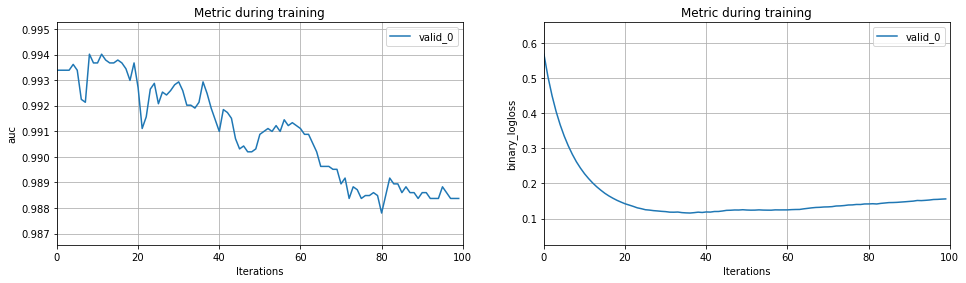

In [30]:
fig = plt.figure( figsize=(16,9) )
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

lgb.plot_metric( eval_result, metric='auc', ax=ax1)
lgb.plot_metric( eval_result, metric='binary_logloss', ax=ax2)
plt.show()

Feature Importance

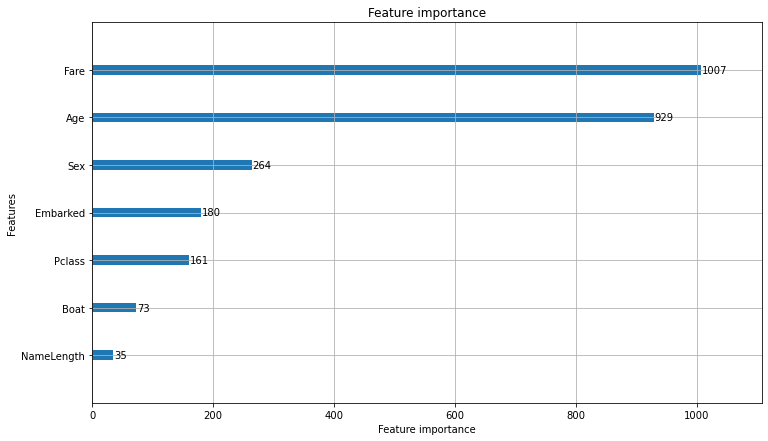

In [31]:
lgb.plot_importance(gbm, max_num_features=None, figsize=(12,7))

Split Value Histogram

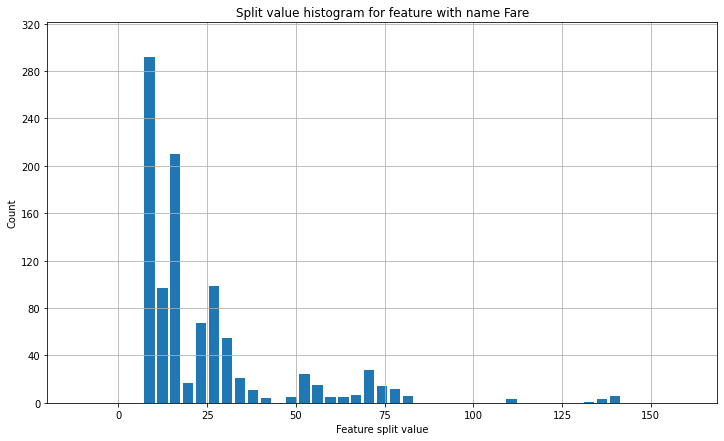

In [32]:
lgb.plot_split_value_histogram(gbm, feature='Fare', bins='auto', figsize=(12,7))

Trees

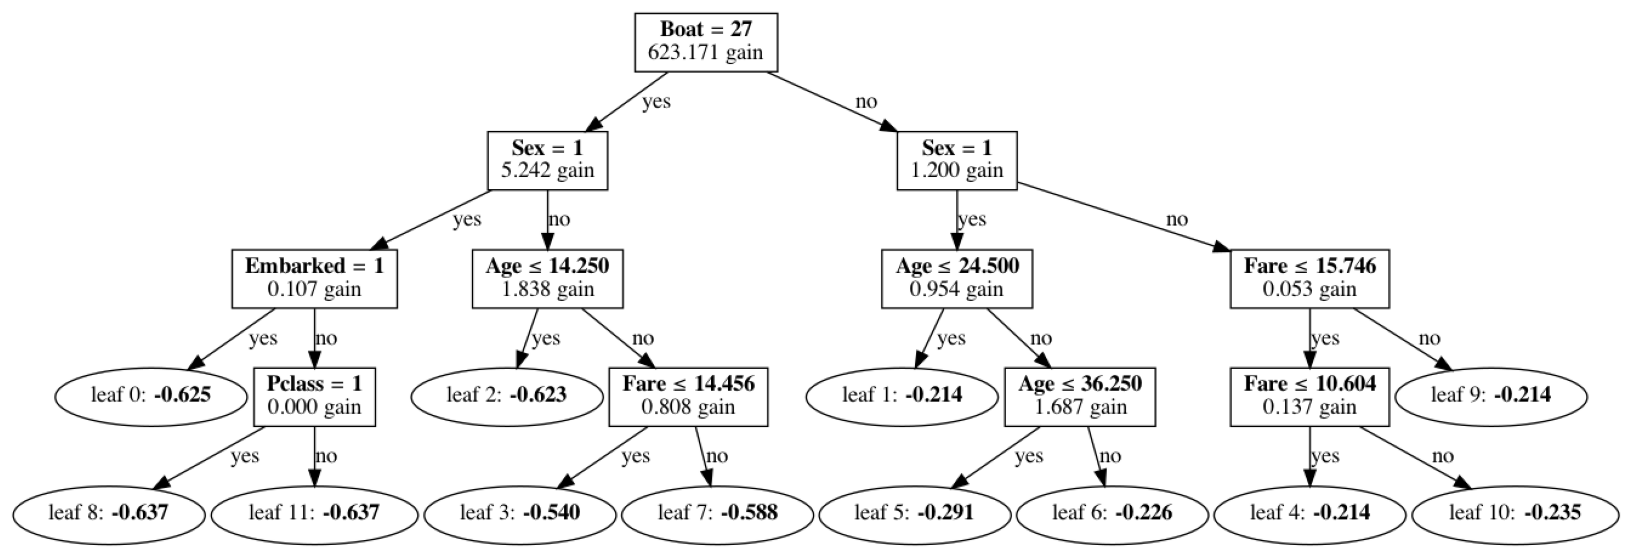

In [33]:
fig, ax = plt.subplots( figsize=(120,10) )
lgb.plot_tree(gbm, ax=ax, tree_index=0, figsize=(10,10), show_info=['split_gain'], orientation='vertical')

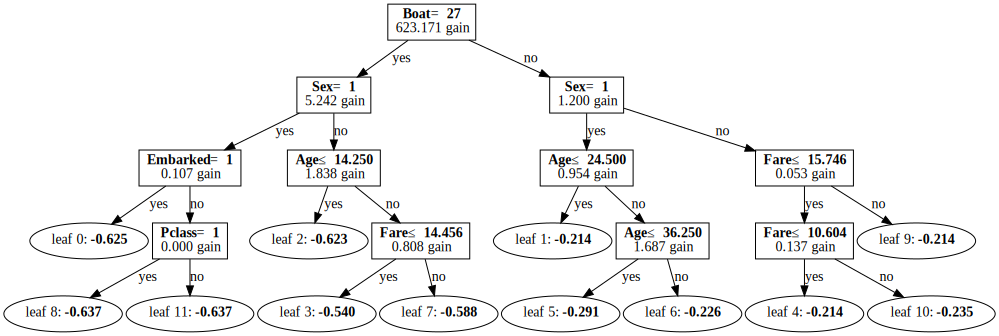

In [34]:
lgb.create_tree_digraph(gbm, show_info='split_gain', orientation='vertical')

### SHAP Analysis

In [35]:
import shap
shap.initjs()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [36]:
explainer   = shap.Explainer(gbm)
shap_values = explainer(X_train)

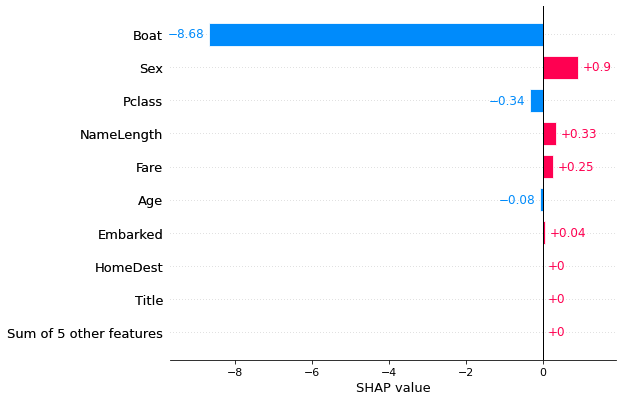

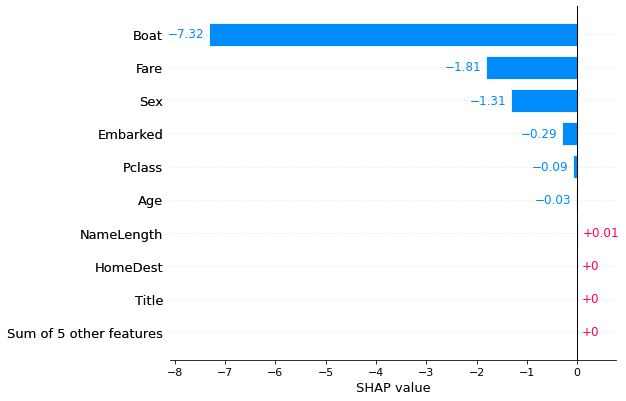

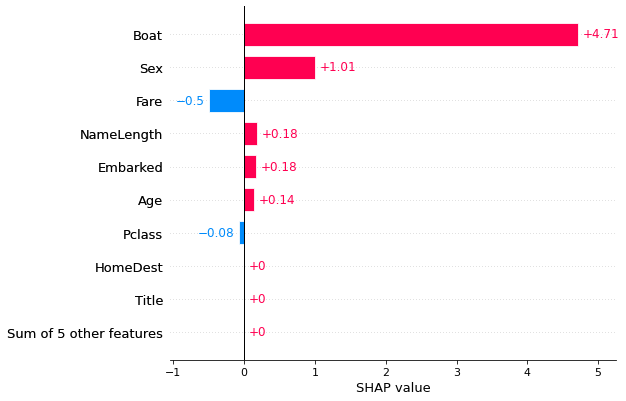

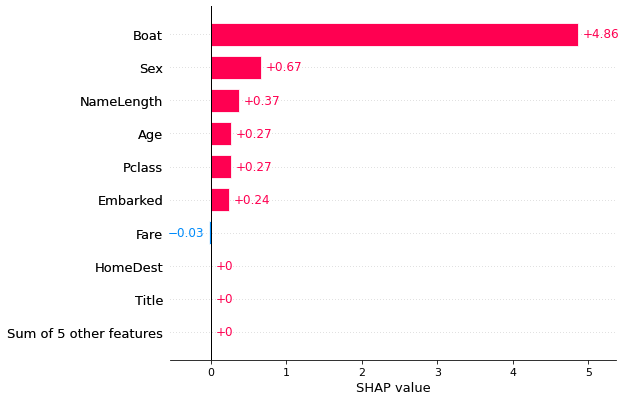

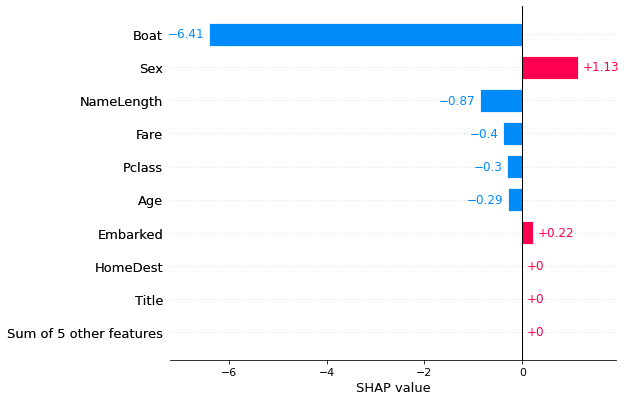

In [37]:
for i in range(5):
    shap.plots.bar(shap_values[:,:,0][i])

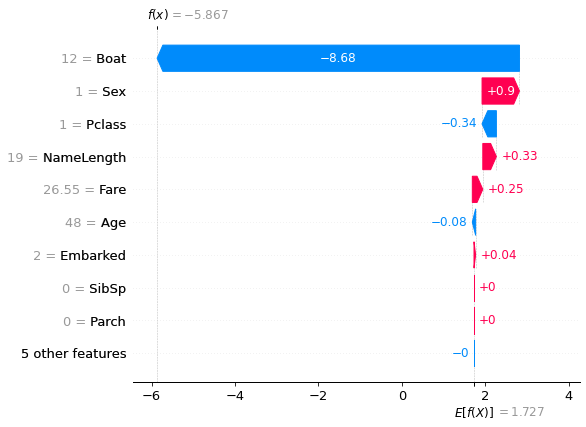

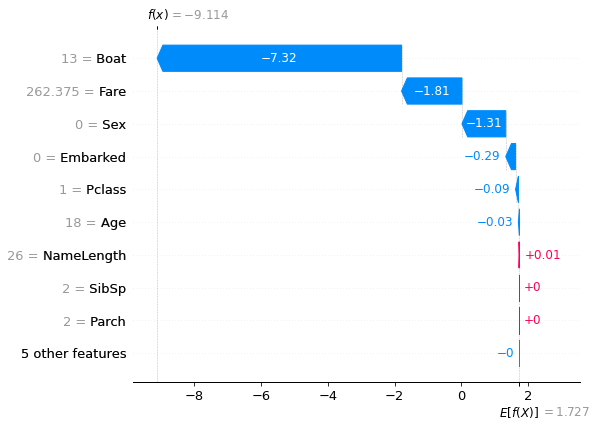

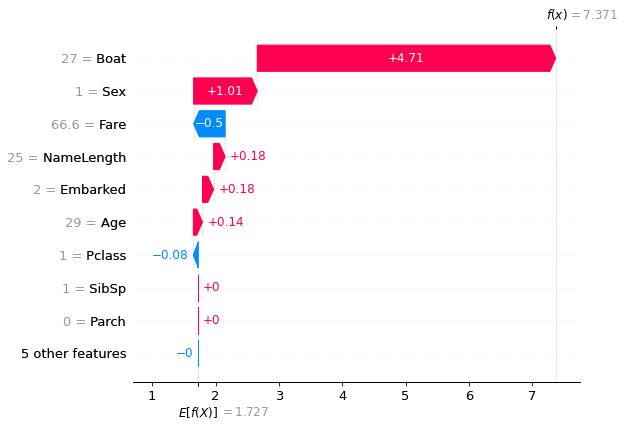

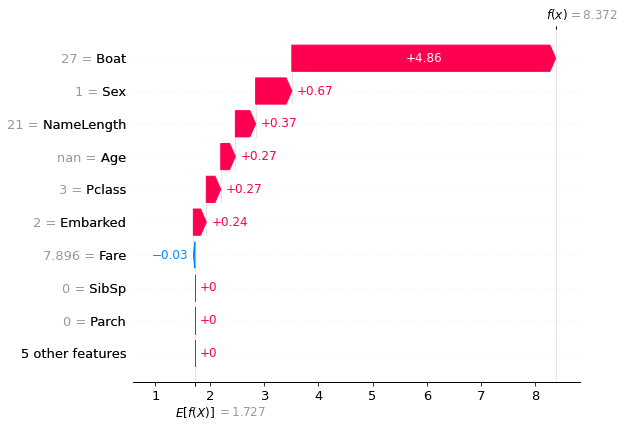

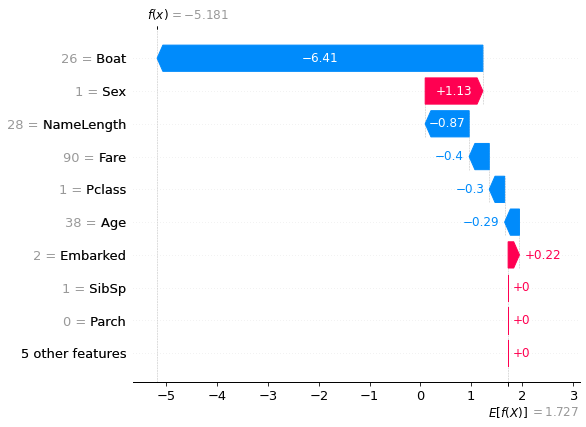

In [38]:
for i in range(5):
    shap.plots.waterfall(shap_values[:,:,0][i])

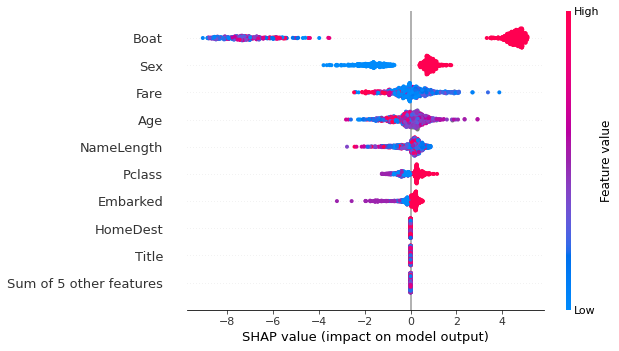

In [39]:
shap.plots.beeswarm(shap_values[:,:,0])

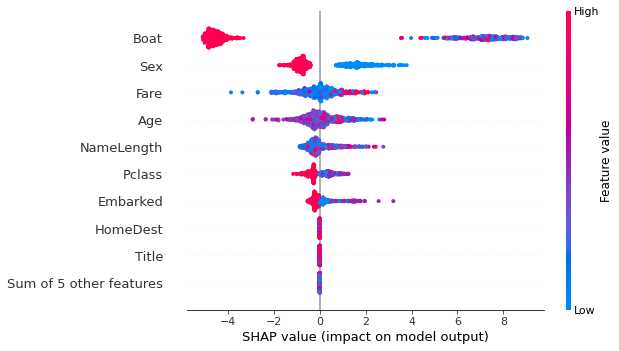

In [40]:
shap.plots.beeswarm(shap_values[:,:,1])

In [41]:
treeExplainer = shap.TreeExplainer(gbm, 
                               data=None, 
                               feature_perturbation= "tree_path_dependent", 
                               model_output='raw')
shap_values = treeExplainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [42]:
shap.force_plot(treeExplainer.expected_value[1], shap_values[1][:100,:], X_train.iloc[0:100,:])

SHAP Summary Plot

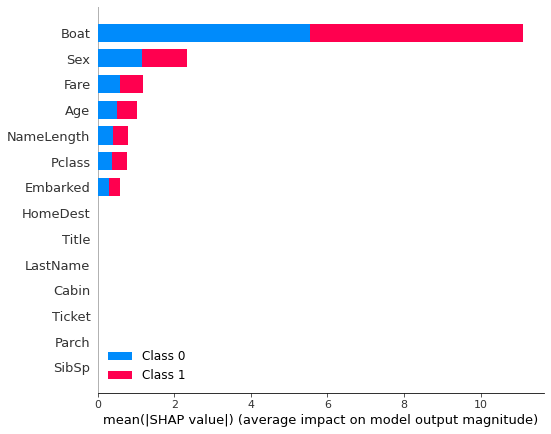

In [43]:
shap.summary_plot(shap_values, X_train)

SHAP Dependence Plots

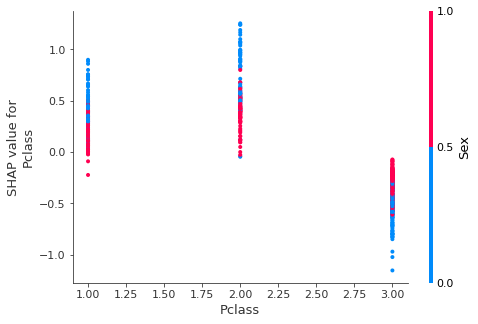

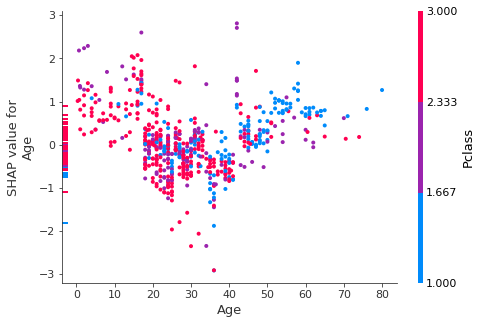

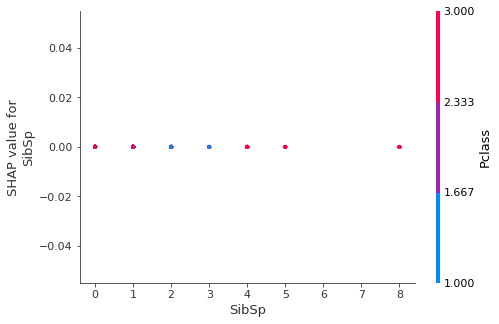

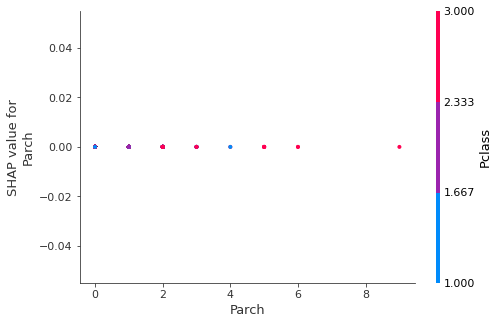

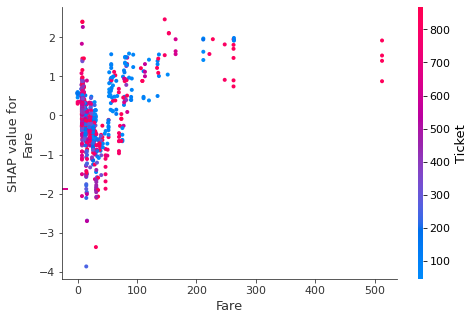

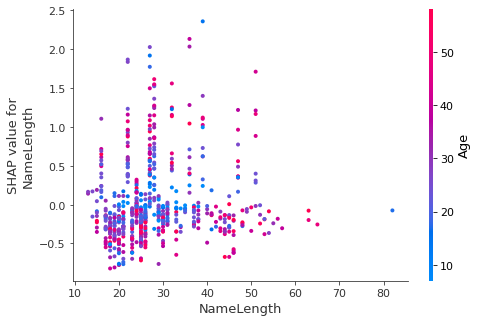

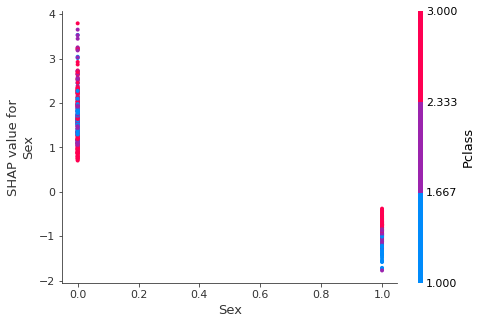

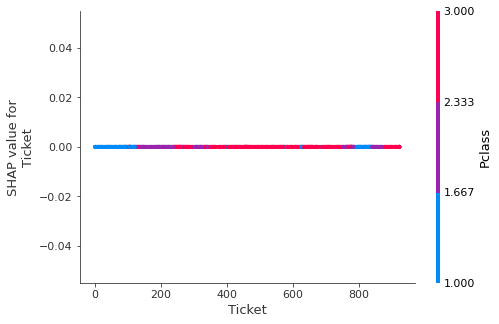

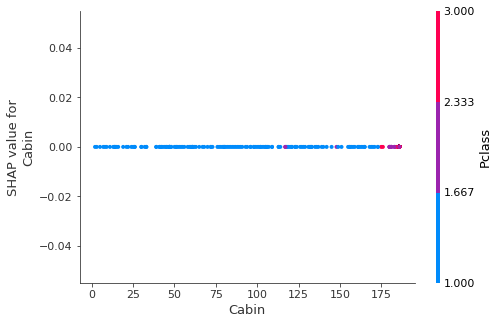

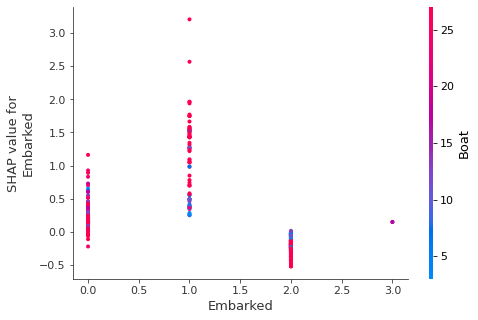

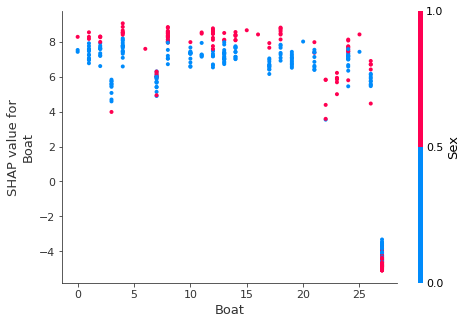

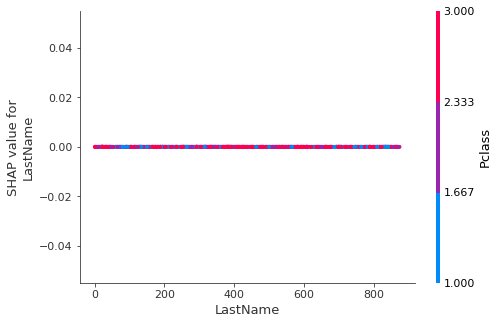

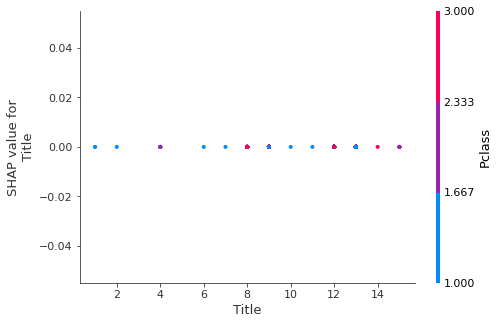

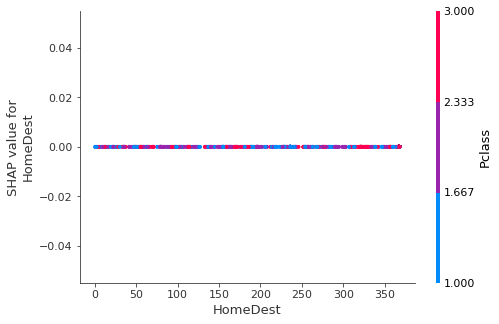

In [44]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_train, display_features=X_train)